In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('bank.csv')

In [4]:
## process categorical values
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [4]:
## convert result column - deposit to 0/1
df['deposit'] = LabelEncoder().fit_transform(df['deposit'])

In [5]:
## deal with categorical data type
cat_col = ['job','marital','education','default','housing','loan','contact','day','month','poutcome']
df_matrix = df.copy()
for col in cat_col:
    df_cat = df[col]
    df_cat_dummy = pd.get_dummies(df_cat,drop_first=True, prefix=col)
    df_matrix.drop(col,axis=1,inplace=True)
    df_matrix = pd.concat([df_matrix,df_cat_dummy],axis=1)
    

In [6]:
from sklearn.preprocessing import MinMaxScaler
num_col = ['age','balance','duration','pdays','previous','campaign']

for col in num_col:
    df_col = df[col]
    df_matrix[col] = (df_col-df_col.min())/(df_col.max()-df_col.min())



In [7]:
df_Y = df_matrix['deposit']
df_X = df_matrix.drop('deposit',axis = 1)

In [8]:
# prepare training and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.33, random_state=42)

In [9]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

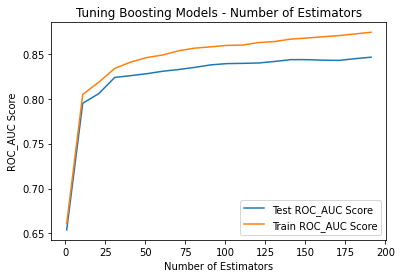

In [12]:

from sklearn.ensemble import GradientBoostingClassifier
train_performance = []
test_performance = []
n_estimators = list(range(1,200,10))
for n in n_estimators:
    gbc = GradientBoostingClassifier(n_estimators=n)
    gbc.fit(X_train, y_train)
    y_pred_train = gbc.predict(X_train)
    y_pred_test = gbc.predict(X_test)
    train_performance.append(roc_auc_score(y_train,y_pred_train))
    test_performance.append(roc_auc_score(y_test,y_pred_test))

plt.plot(n_estimators,test_performance,label = "Test ROC_AUC Score")
plt.plot(n_estimators,train_performance,label = "Train ROC_AUC Score")
plt.ylabel('ROC_AUC Score')
plt.xlabel('Number of Estimators')
plt.title('Tuning Boosting Models - Number of Estimators')
plt.legend(loc='best')
plt.show()

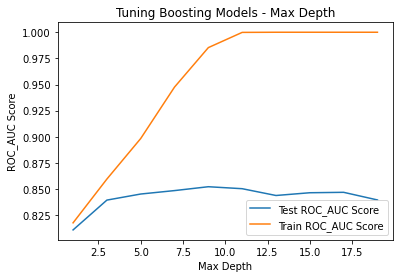

In [14]:
train_performance = []
test_performance = []
max_depths = list(range(1,20,2))
for n in max_depths:
    gbc = GradientBoostingClassifier(n_estimators=100, max_depth=n)
    gbc.fit(X_train, y_train)
    y_pred_train = gbc.predict(X_train)
    y_pred_test = gbc.predict(X_test)
    train_performance.append(roc_auc_score(y_train,y_pred_train))
    test_performance.append(roc_auc_score(y_test,y_pred_test))

plt.plot(max_depths,test_performance,label = "Test ROC_AUC Score")
plt.plot(max_depths,train_performance,label = "Train ROC_AUC Score")
plt.ylabel('ROC_AUC Score')
plt.xlabel('Max Depth')
plt.title('Tuning Boosting Models - Max Depth')
plt.legend(loc='best')
plt.show()

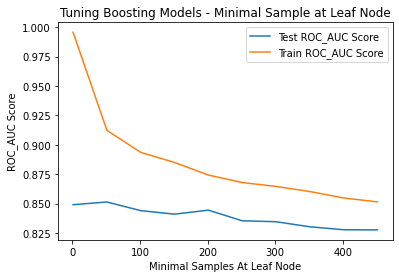

In [15]:
train_performance = []
test_performance = []
min_sample_leaves = list(range(1,500,50))
for n in min_sample_leaves:
    gbc = GradientBoostingClassifier(n_estimators=100, max_depth=10, min_samples_leaf=n)
    gbc.fit(X_train, y_train)
    y_pred_train = gbc.predict(X_train)
    y_pred_test = gbc.predict(X_test)
    train_performance.append(roc_auc_score(y_train,y_pred_train))
    test_performance.append(roc_auc_score(y_test,y_pred_test))

plt.plot(min_sample_leaves,test_performance,label = "Test ROC_AUC Score")
plt.plot(min_sample_leaves,train_performance,label = "Train ROC_AUC Score")
plt.ylabel('ROC_AUC Score')
plt.xlabel('Minimal Samples At Leaf Node')
plt.title('Tuning Boosting Models - Minimal Sample at Leaf Node')
plt.legend(loc='best')
plt.show()

In [6]:
from sklearn.model_selection import cross_validate

In [17]:
train_ratio = [0.1,0.3,0.5,0.7,0.9]
cv_train_scores_mean = []
cv_test_scores_mean = []

real_test_score = []
for i in train_ratio:
    X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=1-i, random_state=42)
    gbc = GradientBoostingClassifier(n_estimators=100, max_depth=10, min_samples_leaf=30)
    cv = cross_validate(gbc,X_train,y_train,cv=5, scoring='roc_auc',n_jobs=-1, return_train_score=True)
    cv_train_scores_mean.append(np.mean(cv['train_score']))
    cv_test_scores_mean.append(np.mean(cv['test_score']))
    



Text(0, 0.5, 'ROC_AUC Score')

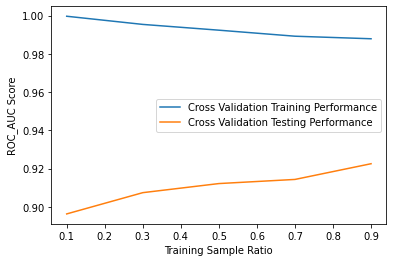

In [18]:
plt.plot(train_ratio,cv_train_scores_mean,label='Cross Validation Training Performance')
plt.plot(train_ratio,cv_test_scores_mean,label='Cross Validation Testing Performance')
plt.legend(loc='best')
plt.xlabel('Training Sample Ratio')
plt.ylabel('ROC_AUC Score')

In [7]:
loan_df = pd.read_csv('Training_Data.csv')

In [8]:
## deal with categorical data type
cat_col = ['Married/Single','House_Ownership','Car_Ownership','Profession','STATE']
df_matrix = loan_df['Risk_Flag']
for col in cat_col:
    df_cat = loan_df[col]
    df_cat_dummy = pd.get_dummies(df_cat,drop_first=True, prefix=col)
    df_matrix = pd.concat([df_matrix,df_cat_dummy],axis=1)


In [9]:
num_col = ['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']
for col in num_col:
    df_col = loan_df[col]
    df_matrix[col] = (df_col-df_col.min())/(df_col.max()-df_col.min())


In [10]:
df_Y = df_matrix['Risk_Flag']
df_X = df_matrix.drop('Risk_Flag',axis = 1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.33, stratify=df_Y, random_state=42)

1
101
201
301
401


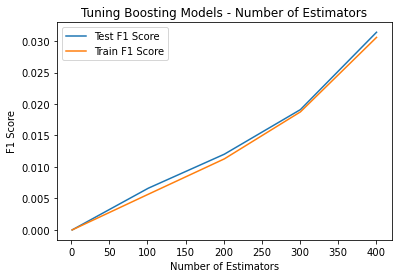

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
train_performance = []
test_performance = []
n_estimators = list(range(1,501,100))
for n in n_estimators:
    print(n)
    gbc = GradientBoostingClassifier(n_estimators=n)
    gbc.fit(X_train, y_train)
    y_pred_train = gbc.predict(X_train)
    y_pred_test = gbc.predict(X_test)
    train_performance.append(f1_score(y_train,y_pred_train))
    test_performance.append(f1_score(y_test,y_pred_test))

plt.plot(n_estimators,test_performance,label = "Test F1 Score")
plt.plot(n_estimators,train_performance,label = "Train F1 Score")
plt.ylabel('F1 Score')
plt.xlabel('Number of Estimators')
plt.title('Tuning Boosting Models - Number of Estimators')
plt.legend(loc='best')
plt.show()

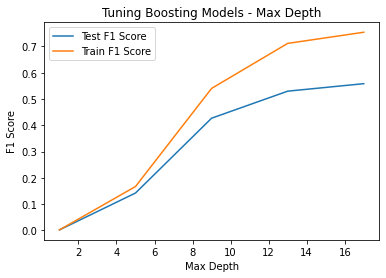

In [15]:
train_performance = []
test_performance = []
max_depths = list(range(1,21,4))
for n in max_depths:
    gbc = GradientBoostingClassifier(n_estimators=300, max_depth=n)
    gbc.fit(X_train, y_train)
    y_pred_train = gbc.predict(X_train)
    y_pred_test = gbc.predict(X_test)
    train_performance.append(f1_score(y_train,y_pred_train))
    test_performance.append(f1_score(y_test,y_pred_test))

plt.plot(max_depths,test_performance,label = "Test F1 Score")
plt.plot(max_depths,train_performance,label = "Train F1 Score")
plt.ylabel('F1 Score')
plt.xlabel('Max Depth')
plt.title('Tuning Boosting Models - Max Depth')
plt.legend(loc='best')
plt.show()

1
201
401
601
801


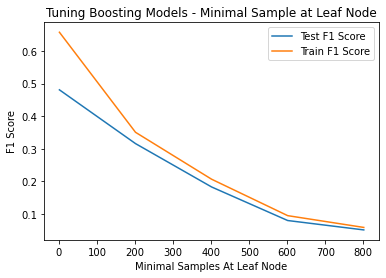

In [17]:
train_performance = []
test_performance = []
min_sample_leaves = list(range(1,1001,200))
for n in min_sample_leaves:
    print(n)
    gbc = GradientBoostingClassifier(n_estimators=100, max_depth=16, min_samples_leaf=n)
    gbc.fit(X_train, y_train)
    y_pred_train = gbc.predict(X_train)
    y_pred_test = gbc.predict(X_test)
    train_performance.append(f1_score(y_train,y_pred_train))
    test_performance.append(f1_score(y_test,y_pred_test))

plt.plot(min_sample_leaves,test_performance,label = "Test F1 Score")
plt.plot(min_sample_leaves,train_performance,label = "Train F1 Score")
plt.ylabel('F1 Score')
plt.xlabel('Minimal Samples At Leaf Node')
plt.title('Tuning Boosting Models - Minimal Sample at Leaf Node')
plt.legend(loc='best')
plt.show()

Text(0, 0.5, 'F1 Score')

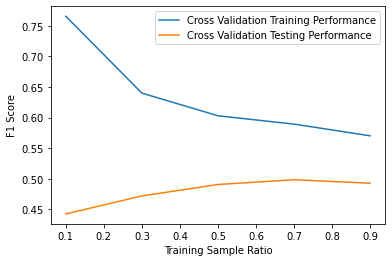

In [18]:
train_ratio = [0.1,0.3,0.5,0.7,0.9]
cv_train_scores_mean = []
cv_test_scores_mean = []

real_test_score = []
for i in train_ratio:
    X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=1-i, random_state=42)
    gbc = GradientBoostingClassifier(n_estimators=100, max_depth=16, min_samples_leaf=10)
    cv = cross_validate(gbc,X_train,y_train,cv=5, scoring='f1',n_jobs=-1, return_train_score=True)
    cv_train_scores_mean.append(np.mean(cv['train_score']))
    cv_test_scores_mean.append(np.mean(cv['test_score']))
    
plt.plot(train_ratio,cv_train_scores_mean,label='Cross Validation Training Performance')
plt.plot(train_ratio,cv_test_scores_mean,label='Cross Validation Testing Performance')
plt.legend(loc='best')
plt.xlabel('Training Sample Ratio')
plt.ylabel('F1 Score')